In [14]:
import xarray as xr
import numpy as np
from mapper_functions import plot_global_tight

In [15]:
# Create a regular grid
lon = np.arange(-180, 180, 0.25)
lat = np.arange(-90, 90, 0.25)
mask = np.zeros([len(lat), len(lon)])

# Fill the mask with 1s in the region of interest which is 0 to 20 latitude and 0 to 20 longitude
mask[360:440, 720:800] = np.ones([80, 80])

ll_lon = -180
ll_lat = -90
d_lon = 0.25
d_lat = 0.25

lon_target = 135
lat_target = -20

i_ind = np.ceil((lon_target - ll_lon)/d_lon)
j_ind = np.ceil((lat_target - ll_lat)/d_lat) 

print(i_ind, j_ind)



1260.0 280.0


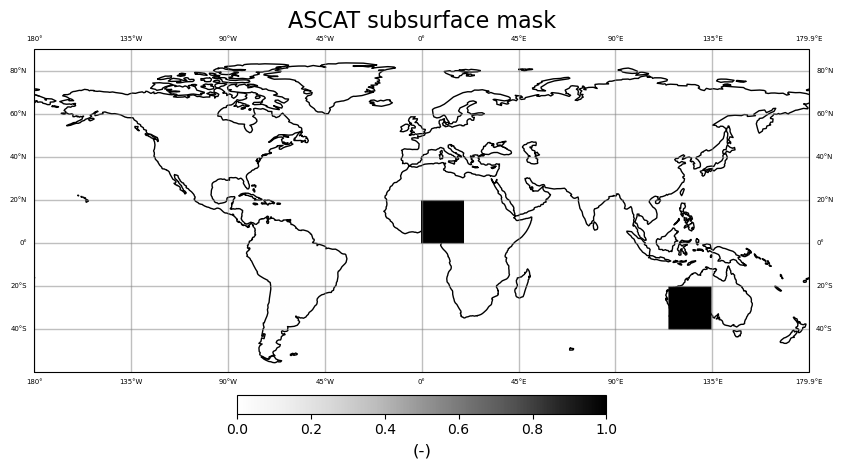

In [16]:


# Fill the mask with 1s in the region of interest which is -40 to -20 latitude and 115 to 135 longitude
mask[200:280, 1180:1260] = np.ones([80, 80])

loncnt = []
latcnt = []
maskcnt = []
cnt = 0

# Loop through the regular grid and assign the mask value. Use the nearest neighbour method with xarray
for i in range(len(lon)):
    for j in range(len(lat)):       
        loncnt.append(lon[i])
        latcnt.append(lat[j])
        maskcnt.append(mask[j, i])

        cnt = cnt + 1

# Plot the mask
plot_array = np.empty([len(loncnt), 3])
plot_array.fill(np.nan)
plot_array[:, 1] = loncnt
plot_array[:, 2] = latcnt
plot_array[:, 0] = maskcnt

plot_global_tight(plot_array,False,'ASCAT subsurface mask','(-)', 0, 1, cmap='Greys')



In [18]:
mask_out = np.where(np.isnan(mask), -128, mask)
mask_out = mask_out.astype(np.int8)
# mask_out = mask

ds = xr.Dataset({'mask': (['lat', 'lon'], mask_out)},
                coords={'lat': (['lat'], lat),
                        'lon': (['lon'], lon)})

# Add attributes to the 'mask' variable
ds['mask'].attrs['standard_name'] = 'subsurface_mask'
ds['mask'].attrs['long_name'] = 'Mask accounting for subsurface scattering'
ds['mask'].attrs['units'] = 'boolean'
ds['mask'].encoding['_FillValue'] = -128

ds.to_netcdf('ascat_test_mask_p25_nt.nc')

ll_lon = -180  # Lower left corner longitude

# Create a new DataArray for ll_lon
ll_lon_da = xr.DataArray(ll_lon, name='ll_lon')
ll_lon_da.attrs['standard_name'] = 'longitude of lower left corner'
ll_lon_da.attrs['long_name'] = 'longitude of lower left corner'
ll_lon_da.attrs['units'] = 'degrees_east'
ll_lon_da.attrs['axis'] = 'X'

# Add ll_lon_da to the dataset
ds['ll_lon'] = ll_lon_da

# Write the dataset to a netCDF file
ds.to_netcdf('ascat_test_mask_p25_nt.nc')

# Repeat for ll_lat
ll_lat = -90  # Lower left corner latitude
ll_lat_da = xr.DataArray(ll_lat, name='ll_lat')
ll_lat_da.attrs['standard_name'] = 'latitude of lower left corner'
ll_lat_da.attrs['long_name'] = 'latitude of lower left corner'
ll_lat_da.attrs['units'] = 'degrees_north'
ll_lat_da.attrs['axis'] = 'Y'

ds['ll_lat'] = ll_lat_da

ds.to_netcdf('ascat_test_mask_p25_nt.nc')

dlon = 0.25  # Longitude grid spacing

# Create a new DataArray for dlon
dlon_da = xr.DataArray(dlon, name='d_lon')
dlon_da.attrs['standard_name'] = 'longitude grid spacing'
dlon_da.attrs['long_name'] = 'longitude grid spacing'
dlon_da.attrs['units'] = 'degrees'
dlon_da.attrs['axis'] = 'X'

# Add dlon_da to the dataset
ds['d_lon'] = dlon_da

# Write the dataset to a netCDF file
ds.to_netcdf('ascat_test_mask_p25_nt.nc')

# Repeat for dlat
dlat = 0.25  # Latitude grid spacing
dlat_da = xr.DataArray(dlat, name='d_lat')
dlat_da.attrs['standard_name'] = 'latitude grid spacing'
dlat_da.attrs['long_name'] = 'latitude grid spacing'
dlat_da.attrs['units'] = 'degrees'
dlat_da.attrs['axis'] = 'Y'

ds['d_lat'] = dlat_da

ds.to_netcdf('ascat_test_mask_p25_nt.nc')

3150.0 700.0
2950.0 500.0


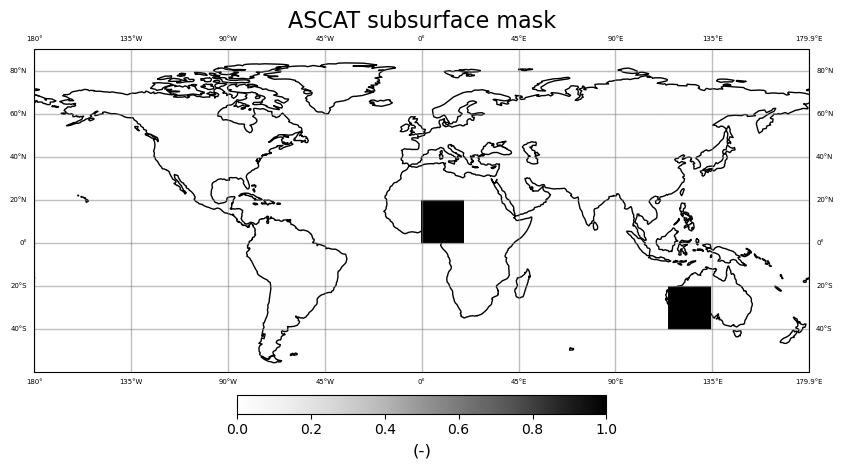

In [12]:
# Create a regular grid
lon = np.arange(-180, 180, 0.1)
lat = np.arange(-90, 90, 0.1)
mask = np.zeros([len(lat), len(lon)])

# Fill the mask with 1s in the region of interest which is 0 to 20 latitude and 0 to 20 longitude
mask[900:1100, 1800:2000] = np.ones([200, 200])

ll_lon = -180
ll_lat = -90
d_lon = 0.1
d_lat = 0.1

lon_target = 135
lat_target = -20

i_ind = np.ceil((lon_target - ll_lon)/d_lon)
j_ind = np.ceil((lat_target - ll_lat)/d_lat)

print(i_ind, j_ind)

lon_target = 115
lat_target = -40

i_ind2 = np.ceil((lon_target - ll_lon)/d_lon)
j_ind2 = np.ceil((lat_target - ll_lat)/d_lat)

print(i_ind2, j_ind2)

# Fill the mask with 1s in the region of interest which is -40 to -20 latitude and 115 to 135 longitude
mask[500:700, 2950:3150] = np.ones([200, 200])


loncnt = []
latcnt = []
maskcnt = []
cnt = 0

# Loop through the regular grid and assign the mask value. Use the nearest neighbour method with xarray
for i in range(len(lon)):
    for j in range(len(lat)):       
        loncnt.append(lon[i])
        latcnt.append(lat[j])
        maskcnt.append(mask[j, i])

        cnt = cnt + 1

# Plot the mask
plot_array = np.empty([len(loncnt), 3])
plot_array.fill(np.nan)
plot_array[:, 1] = loncnt
plot_array[:, 2] = latcnt
plot_array[:, 0] = maskcnt

plot_global_tight(plot_array,False,'ASCAT subsurface mask','(-)', 0, 1, cmap='Greys')

In [13]:
mask_out = np.where(np.isnan(mask), -128, mask)
mask_out = mask_out.astype(np.int8)
# mask_out = mask

ds = xr.Dataset({'mask': (['lon', 'lat'], mask_out.T)},
                coords={'lon': (['lon'], lon),
                        'lat': (['lat'], lat)})

# Add attributes to the 'mask' variable
ds['mask'].attrs['standard_name'] = 'subsurface_mask'
ds['mask'].attrs['long_name'] = 'Mask accounting for subsurface scattering'
ds['mask'].attrs['units'] = 'boolean'
ds['mask'].encoding['_FillValue'] = -128

ds.to_netcdf('ascat_test_mask_p1.nc')

ll_lon = -180  # Lower left corner longitude

# Create a new DataArray for ll_lon
ll_lon_da = xr.DataArray(ll_lon, name='ll_lon')
ll_lon_da.attrs['standard_name'] = 'longitude of lower left corner'
ll_lon_da.attrs['long_name'] = 'longitude of lower left corner'
ll_lon_da.attrs['units'] = 'degrees_east'
ll_lon_da.attrs['axis'] = 'X'

# Add ll_lon_da to the dataset
ds['ll_lon'] = ll_lon_da

# Write the dataset to a netCDF file
ds.to_netcdf('ascat_test_mask_p1.nc')

# Repeat for ll_lat
ll_lat = -90  # Lower left corner latitude
ll_lat_da = xr.DataArray(ll_lat, name='ll_lat')
ll_lat_da.attrs['standard_name'] = 'latitude of lower left corner'
ll_lat_da.attrs['long_name'] = 'latitude of lower left corner'
ll_lat_da.attrs['units'] = 'degrees_north'
ll_lat_da.attrs['axis'] = 'Y'

ds['ll_lat'] = ll_lat_da

ds.to_netcdf('ascat_test_mask_p1.nc')

dlon = 0.1  # Longitude grid spacing

# Create a new DataArray for dlon
dlon_da = xr.DataArray(dlon, name='d_lon')
dlon_da.attrs['standard_name'] = 'longitude grid spacing'
dlon_da.attrs['long_name'] = 'longitude grid spacing'
dlon_da.attrs['units'] = 'degrees'
dlon_da.attrs['axis'] = 'X'

# Add dlon_da to the dataset
ds['d_lon'] = dlon_da

# Write the dataset to a netCDF file
ds.to_netcdf('ascat_test_mask_p1.nc')

# Repeat for dlat
dlat = 0.1  # Latitude grid spacing
dlat_da = xr.DataArray(dlat, name='d_lat')
dlat_da.attrs['standard_name'] = 'latitude grid spacing'
dlat_da.attrs['long_name'] = 'latitude grid spacing'
dlat_da.attrs['units'] = 'degrees'
dlat_da.attrs['axis'] = 'Y'

ds['d_lat'] = dlat_da

ds.to_netcdf('ascat_test_mask_p1.nc')